<h2 style="color:green" align="center">Implement Gradient Descent For Neural Network (or Logistic Regression)</h2>

<h4 style="color:blue">Predicting if a person would buy life insurnace based on his age using logistic regression</h4>

Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't). 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


**Split train and test set**

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

**Preprocessing: Scale the data so that both age and affordibility are in same scaling range**

In [4]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

**Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network**

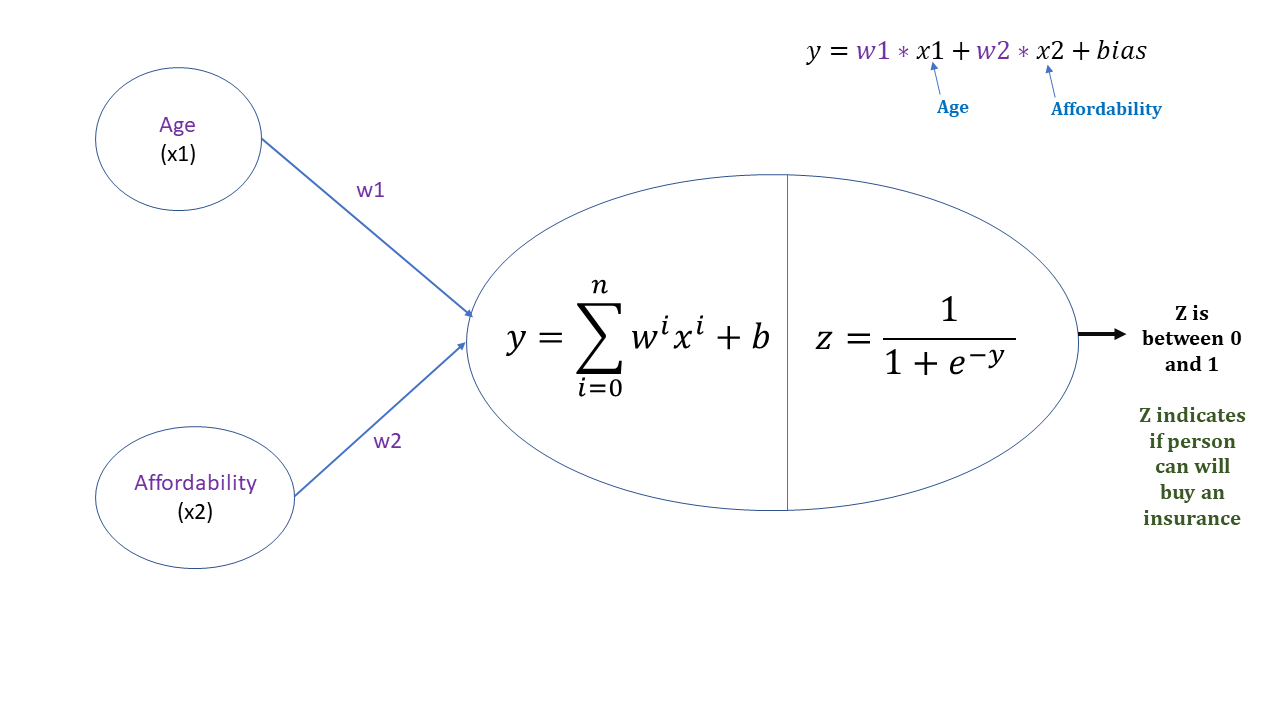

In [6]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=3000)

Epoch 1/3000


c:\WAHTEVER ELSE\GEEK STUFF\python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step - accuracy: 0.5000 - loss: 0.7113
Epoch 2/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.7110
Epoch 3/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.7106
Epoch 4/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.7102
Epoch 5/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.7098
Epoch 6/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.7094
Epoch 7/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.5000 - loss: 0.7091
Epoch 8/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5000 - loss: 0.7087
Epoch 9/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.7083
Epoch 10/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5000 - loss: 0.7079
Epoch 11/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5000 - loss: 0.7076
Epoch 12/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5000 - lo

**Evaluate the model on test set**

In [ ]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 1ms/step - loss: 0.3550 - accuracy: 1.0000


[0.35497748851776123, 1.0]

In [ ]:
model.predict(X_test_scaled)

array([[0.7054848 ],
       [0.35569546],
       [0.16827849],
       [0.47801173],
       [0.7260697 ],
       [0.8294984 ]], dtype=float32)

In [ ]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

**Now get the value of weights and bias from the model**

In [ ]:
coef, intercept = model.get_weights()

In [ ]:
coef, intercept

(array([[5.060867 ],
        [1.4086502]], dtype=float32),
 array([-2.9137027], dtype=float32))

**This means w1=5.060867, w2=1.4086502, bias =-2.9137027**

In [ ]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [ ]:
X_test

,age,affordibility
2,47,1
10,18,1
21,26,0
11,28,1
14,49,1
9,61,1


**Instead of model.predict, write our own prediction function that uses w1,w2 and bias**

In [ ]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

prediction_function(.47, 1)

0.7054848693136117

In [ ]:
prediction_function(.18, 1)

0.35569549781937626

**Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent**

**First write couple of helper routines such as sigmoid and log_loss**

In [ ]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [ ]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

**All right now comes the time to implement our final gradient descent function !! yay !!!**

In [ ]:
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1
    bias = 0
    rate = 0.5
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:
            break

    return w1, w2, bias

In [ ]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.681264778737757
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.2977578997796538, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.3715094724003511, loss:0.6431523291301917
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.43506643026891584, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.48994490058938817, loss:0.623471707997592
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522853, loss:0.6175321183044205
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894963, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567942, w2:0.7965748796787705, bias:-0.6155315088627655, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557357, w2:0.7973647616854131, bia

Epoch:143, w1:2.7620360898674554, w2:1.3625161715956964, bias:-1.9445176396319575, loss:0.5203534541809204
Epoch:144, w1:2.7746084404162294, w2:1.363590506151157, bias:-1.9505246507415273, loss:0.5199615422134104
Epoch:145, w1:2.787158440588389, w2:1.364647771776508, bias:-1.9565093078173448, loss:0.5195713711450981
Epoch:146, w1:2.7996860774661636, w2:1.3656883028554423, bias:-1.9624718597000501, loss:0.5191829289852049
Epoch:147, w1:2.812191339383268, w2:1.3667124274051172, bias:-1.9684125510037105, loss:0.5187962039411522
Epoch:148, w1:2.824674215900416, w2:1.3677204672010856, bias:-1.974331622196247, loss:0.5184111844124737
Epoch:149, w1:2.8371346977812824, w2:1.3687127378995887, bias:-1.9802293096782038, loss:0.5180278589849453
Epoch:150, w1:2.8495727769689085, w2:1.3696895491572745, bias:-1.986105845859897, loss:0.5176462164249294
Epoch:151, w1:2.861988446562542, w2:1.3706512047484, bias:-1.9919614592369834, loss:0.5172662456739209
Epoch:152, w1:2.8743817007948973, w2:1.371598002

Epoch:292, w1:4.396956277089129, w2:1.436536750762052, bias:-2.674696134161793, loss:0.476769423013028
Epoch:293, w1:4.406422402943988, w2:1.4368197195076962, bias:-2.6788098163328593, loss:0.47655558865809444
Epoch:294, w1:4.415870383997634, w2:1.4371022067024166, bias:-2.682915659345727, loss:0.4763425728427668
Epoch:295, w1:4.425300261221806, w2:1.437384230129958, bias:-2.6870136942431952, loss:0.476130371915163
Epoch:296, w1:4.434712075563564, w2:1.4376658071878416, bias:-2.69110395175598, loss:0.47591898224186396
Epoch:297, w1:4.4441058679436996, w2:1.4379469548945394, bias:-2.6951864623075887, loss:0.4757084002078021
Epoch:298, w1:4.453481679255187, w2:1.4382276898965187, bias:-2.6992612560191143, loss:0.47549862221614797
Epoch:299, w1:4.462839550361659, w2:1.4385080284751603, bias:-2.703328362713941, loss:0.4752896446882009
Epoch:300, w1:4.472179522095915, w2:1.438787986553552, bias:-2.707387811922373, loss:0.4750814640632793
Epoch:301, w1:4.4815016352584625, w2:1.43906757970315

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

In [ ]:
coef, intercept

(array([[5.060867 ],
        [1.4086502]], dtype=float32),
 array([-2.9137027], dtype=float32))

**This shows that in the end we were able to come up with same value of w1,w2 and bias using a plain python implementation of gradient descent function**